1. Importing essential libraries for data preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\yunus\Desktop\tulasi\abc-sentiment.csv")

In [3]:
df.head()

,Date,headline,compound,neg,neu,pos
0,2003-02-19,expressions of interest sought to build livestock,0.4588,0.000,0.667,0.333
1,2003-02-19,nsw opp pledges 50m drought relief,0.4767,0.000,0.617,0.383
2,2003-02-19,rain eases wheatbelt water woes,-0.1531,0.354,0.366,0.280
3,2003-02-19,resource stocks boost all ords,0.4019,0.000,0.597,0.403
4,2003-02-19,restraint order issued against anti discrimina...,-0.3182,0.315,0.685,0.000


In [4]:
# adding only columns which are used for processing

X = df[['Date', 'compound']].copy()

# resetting the index of the dataframe

X = X.reset_index(drop = False)

# changing the 'Date' format as 'datetime' format
X["Date"] = pd.to_datetime(X["Date"],errors = 'coerce', format = '%Y-%m-%dT%H:%M',infer_datetime_format = True, cache = True,utc=True)
X["Date"] = pd.to_datetime(X["Date"])

# indexing the dataframe as 'Date'

X = X.set_index(pd.DatetimeIndex(X["Date"]))
X.set_index("Date")
X.shape

(60956, 3)

In [5]:
X.head()

,index,Date,compound
Date,,,
2003-02-19 00:00:00+00:00,0,2003-02-19 00:00:00+00:00,0.4588
2003-02-19 00:00:00+00:00,1,2003-02-19 00:00:00+00:00,0.4767
2003-02-19 00:00:00+00:00,2,2003-02-19 00:00:00+00:00,-0.1531
2003-02-19 00:00:00+00:00,3,2003-02-19 00:00:00+00:00,0.4019
2003-02-19 00:00:00+00:00,4,2003-02-19 00:00:00+00:00,-0.3182


In [6]:
X.dtypes

index                     int64
Date        datetime64[ns, UTC]
compound                float64
dtype: object

In [7]:
# dropping the 'Date' from the dataframe

X = X.drop(["Date"],axis= 1)

In [8]:
# resampling the dataframe based upon 1d = one day wise

X = X.resample('1d').first()
X = X.tz_convert(None)

In [9]:
X.head()

,index,compound
Date,,
2003-02-19,0.0,0.4588
2003-02-20,7.0,-0.7351
2003-02-21,22.0,0.1531
2003-02-22,44.0,-0.4939
2003-02-23,55.0,-0.7430


In [10]:
# reading the british petroluem data into a dataframe bp_df

bp_df = pd.read_csv(r"C:\Users\yunus\Desktop\tulasi\BP.csv")

In [11]:
bp_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/14/2003,42.560001,43.150002,42.520000,42.900002,18.079893,2683900
1,8/15/2003,42.650002,42.650002,42.139999,42.400002,17.869173,1595300
2,8/18/2003,42.400002,42.770000,42.400002,42.700001,17.995600,2383100
3,8/19/2003,43.540001,43.540001,41.849998,42.230000,17.797520,2119800
4,8/20/2003,42.119999,42.520000,42.029999,42.439999,17.886023,1691500


In [12]:
# renaming the column from 'Adj Close' as 'BP'

bp_df.rename({'Adj Close' : 'BP'}, axis = 1, inplace =True)

In [13]:
bp_df.head()

,Date,Open,High,Low,Close,BP,Volume
0,8/14/2003,42.560001,43.150002,42.520000,42.900002,18.079893,2683900
1,8/15/2003,42.650002,42.650002,42.139999,42.400002,17.869173,1595300
2,8/18/2003,42.400002,42.770000,42.400002,42.700001,17.995600,2383100
3,8/19/2003,43.540001,43.540001,41.849998,42.230000,17.797520,2119800
4,8/20/2003,42.119999,42.520000,42.029999,42.439999,17.886023,1691500


In [14]:
# changing the 'Date' structure to datetime format



bp_df['Date'] = pd.to_datetime(bp_df['Date'], format='%m/%d/%Y')

In [15]:
bp_df.head()

,Date,Open,High,Low,Close,BP,Volume
0,2003-08-14,42.560001,43.150002,42.520000,42.900002,18.079893,2683900
1,2003-08-15,42.650002,42.650002,42.139999,42.400002,17.869173,1595300
2,2003-08-18,42.400002,42.770000,42.400002,42.700001,17.995600,2383100
3,2003-08-19,43.540001,43.540001,41.849998,42.230000,17.797520,2119800
4,2003-08-20,42.119999,42.520000,42.029999,42.439999,17.886023,1691500


In [16]:
# copying the essential columns 'Date', 'Bp' to a new column

bp = bp_df[['Date', 'BP']].copy()

In [17]:
bp.head()

,Date,BP
0,2003-08-14,18.079893
1,2003-08-15,17.869173
2,2003-08-18,17.995600
3,2003-08-19,17.797520
4,2003-08-20,17.886023


In [18]:
y = bp

In [19]:
y.shape

(4027, 2)

In [20]:
y.head()

,Date,BP
0,2003-08-14,18.079893
1,2003-08-15,17.869173
2,2003-08-18,17.995600
3,2003-08-19,17.797520
4,2003-08-20,17.886023


In [21]:
X.head()

,index,compound
Date,,
2003-02-19,0.0,0.4588
2003-02-20,7.0,-0.7351
2003-02-21,22.0,0.1531
2003-02-22,44.0,-0.4939
2003-02-23,55.0,-0.7430


In [22]:
# merging the two dataframes 'british petroleum' and 'sentiment score' into a dataframe based on column 'Date'
# as we need to match the dataframes based upon same date.

merged_df = pd.merge_asof(X, y, on='Date')

In [23]:
merged_df.head()

,Date,index,compound,BP
0,2003-02-19,0.0,0.4588,NaN
1,2003-02-20,7.0,-0.7351,NaN
2,2003-02-21,22.0,0.1531,NaN
3,2003-02-22,44.0,-0.4939,NaN
4,2003-02-23,55.0,-0.7430,NaN


In [24]:
merged_df

,Date,index,compound,BP
0,2003-02-19,0.0,0.4588,NaN
1,2003-02-20,7.0,-0.7351,NaN
2,2003-02-21,22.0,0.1531,NaN
3,2003-02-22,44.0,-0.4939,NaN
4,2003-02-23,55.0,-0.7430,NaN
...,...,...,...,...
6155,2019-12-27,60942.0,0.0000,33.925171
6156,2019-12-28,60944.0,0.6369,33.925171
6157,2019-12-29,60947.0,0.2960,33.925171
6158,2019-12-30,60948.0,-0.4939,33.925171


In [25]:
result = merged_df.fillna(method='ffill', inplace=False)

In [26]:
result.head()

,Date,index,compound,BP
0,2003-02-19,0.0,0.4588,NaN
1,2003-02-20,7.0,-0.7351,NaN
2,2003-02-21,22.0,0.1531,NaN
3,2003-02-22,44.0,-0.4939,NaN
4,2003-02-23,55.0,-0.7430,NaN


In [27]:
result.tail()

,Date,index,compound,BP
6155,2019-12-27,60942.0,0.0000,33.925171
6156,2019-12-28,60944.0,0.6369,33.925171
6157,2019-12-29,60947.0,0.2960,33.925171
6158,2019-12-30,60948.0,-0.4939,33.925171
6159,2019-12-31,60952.0,-0.2263,33.925171


In [28]:
# filling the NaN values with the mean of that column as we cannot keep those columns empty or removed, 
# because if we do the removal or empty them then the data will look inappropriate 

result.fillna(result.mean())

,Date,index,compound,BP
0,2003-02-19,0.0,0.4588,28.366914
1,2003-02-20,7.0,-0.7351,28.366914
2,2003-02-21,22.0,0.1531,28.366914
3,2003-02-22,44.0,-0.4939,28.366914
4,2003-02-23,55.0,-0.7430,28.366914
...,...,...,...,...
6155,2019-12-27,60942.0,0.0000,33.925171
6156,2019-12-28,60944.0,0.6369,33.925171
6157,2019-12-29,60947.0,0.2960,33.925171
6158,2019-12-30,60948.0,-0.4939,33.925171


In [29]:
# changing the index to date as the values will be assigned or indexed based upon the Date not on numbers
# this is essential when we are doing the time series processing
# the indexed from Date has been saved in the new dataframe df2.

df3 = result.sort_values("Date")
df3 = result.set_index("Date")
df3.head()

,index,compound,BP
Date,,,
2003-02-19,0.0,0.4588,NaN
2003-02-20,7.0,-0.7351,NaN
2003-02-21,22.0,0.1531,NaN
2003-02-22,44.0,-0.4939,NaN
2003-02-23,55.0,-0.7430,NaN


In [30]:
# after changing the index, if we found any NaN cells, we will fill those with mean of the same column

df3 = df3.fillna(df3.mean())

In [31]:
df3.head()

,index,compound,BP
Date,,,
2003-02-19,0.0,0.4588,28.366914
2003-02-20,7.0,-0.7351,28.366914
2003-02-21,22.0,0.1531,28.366914
2003-02-22,44.0,-0.4939,28.366914
2003-02-23,55.0,-0.7430,28.366914


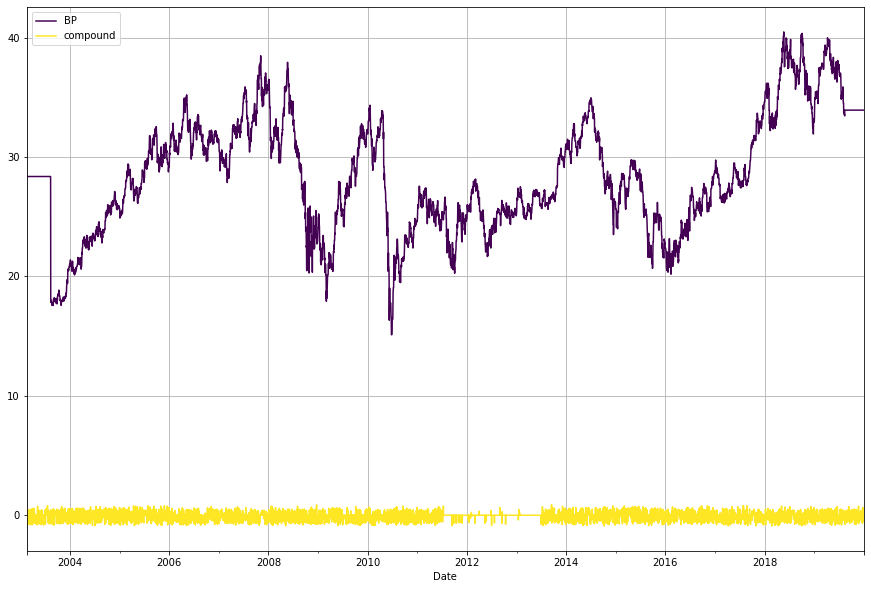

In [32]:
# plotting the graph of dataframe using matplotlib

df3[["BP","compound"]].plot(cmap = "viridis",linestyle='-',figsize = (15,10))
plt.grid()
plt.show()

In [33]:
df3.to_csv(r"C:\Users\yunus\Desktop\tulasi\final.csv")